In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_excel('Lab_Standard_Data.xlsx')
#print(df.head(5))

# NOTES: Started using Labview in Feb, 2019
#        Adjusted instrumentation location in May, 2019
#        Ran in automated mode in May, 2019 
#        2,587 data points ranging from 2015 - 2019

unique_data = df.nunique() 
print(unique_data)

Year               6
Month             12
Day                2
Tunnel             2
Speed              3
Code              17
Pd              1162
Sp               131
CFM             2226
Volts            212
Amp              167
Watt            2556
RPM             2231
Dry_bulb         907
Wet_bulb        1405
Barometer         84
RH              2046
power_factor       7
dtype: int64


In [70]:
P_sat_table = [(50,60), (0.3559, 0.6218)]
P_sat = (0.3559 + (df.Wet_bulb - 50) * ( (0.6218 - 0.3559) / 10) )
P_std = 29.9295 #in Hg
T_std = 72 #F
df['correction_factor'] =(P_std / (df.Barometer - P_sat * (df.RH / 100) ) ) * (df.Dry_bulb / T_std)
df['standard_airflow'] = df.CFM / df.correction_factor

# Lab conditions by month (Temp, wetbulb, humidity, pressure)

(70, 80)

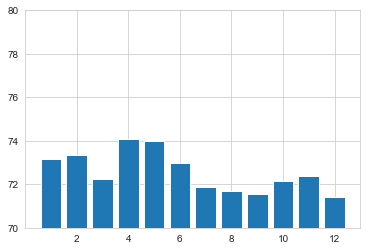

In [71]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

lab_conditions_dry_bulb = df.groupby('Month').Dry_bulb.mean()
num_data_per_month = df.groupby('Month').Dry_bulb.count()
#print(num_data_per_month)
#print(lab_conditions_dry_bulb)
plt.bar(months, lab_conditions_dry_bulb)
plt.ylim(70,80)

(50, 70)

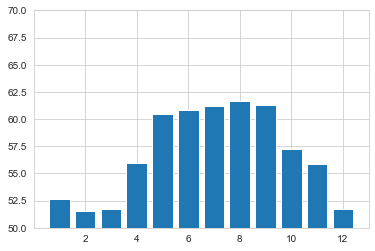

In [72]:
lab_conditions_wet_bulb = df.groupby('Month').Wet_bulb.mean()
#print(lab_conditions_wet_bulb)
plt.bar(months, lab_conditions_wet_bulb)
plt.ylim(50,70)

<BarContainer object of 12 artists>

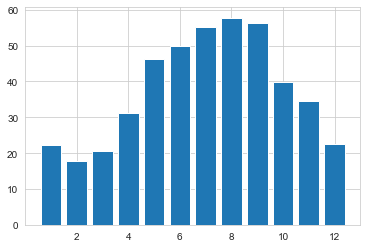

In [73]:
lab_conditions_humidity = df.groupby('Month').RH.mean()
#print(lab_conditions_humidity)
plt.bar(months, lab_conditions_humidity)

(29, 30)

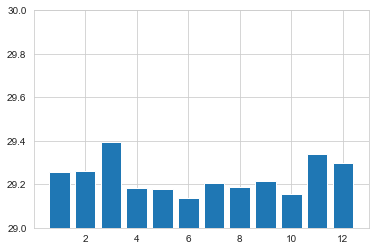

In [74]:
lab_conditions_pressure = df.groupby('Month').Barometer.mean()
#print(lab_conditions_pressure)
plt.bar(months, lab_conditions_pressure)
plt.ylim(29,30)

(1, 1.1)

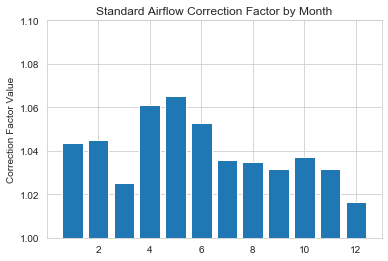

In [75]:
monthly_correction_factor = df.groupby('Month').correction_factor.mean()
#print(monthly_correction_factor)
plot5 = plt.bar(months, monthly_correction_factor)
plt.title('Standard Airflow Correction Factor by Month')
plt.ylabel('Correction Factor Value')
plt.ylim(1,1.1)

In [76]:
def Airflow_Speed(speed):
    Black_Speed = df.loc[(df['Tunnel'] == 'black') & (df['Speed'] == speed)]
    Black_Speed_CFM = Black_Speed.groupby('Year').CFM.mean().reset_index()
    Yellow_Speed = df.loc[(df['Tunnel'] == 'yellow') & (df['Speed'] == speed)]
    Yellow_Speed_CFM = Yellow_Speed.groupby('Year').CFM.mean().reset_index()
    y_min = Black_Speed_CFM. CFM .min() if Black_Speed_CFM. CFM .min() < \
        Yellow_Speed_CFM. CFM .min() else Yellow_Speed_CFM. CFM .min()
    y_max = Black_Speed_CFM. CFM .max() if Black_Speed_CFM. CFM .max() < \
        Yellow_Speed_CFM. CFM .max() else Yellow_Speed_CFM. CFM .max()
    #print(Black_Speed_CFM)
    #print(Yellow_Speed_CFM)
    X_months = list(range(2015,2021))
    plt.plot(X_months, Black_Speed_CFM.CFM)
    plt.plot(X_months, Yellow_Speed_CFM.CFM)
    plt.ylabel( 'Airflow (CFM)')
    plt.xlabel( 'Year')
    plt.ylim(y_min * 0.98, y_max * 1.02)
    plt.xticks(X_months)
    plt.show()

def Watts_Speed(speed):
    Black_Speed = df.loc[(df['Tunnel'] == 'black') & (df['Speed'] == speed)]
    Black_Speed_parameter = Black_Speed.groupby('Year').Watt.mean().reset_index()

    Yellow_Speed = df.loc[(df['Tunnel'] == 'yellow') & (df['Speed'] == speed)]
    Yellow_Speed_parameter = Yellow_Speed.groupby('Year').Watt.mean().reset_index()

    y_min = Black_Speed_parameter. Watt .min() if Black_Speed_parameter. Watt .min() < \
        Yellow_Speed_parameter. Watt .min() else Yellow_Speed_parameter. Watt .min()
    y_max = Black_Speed_parameter. Watt .max() if Black_Speed_parameter. Watt .max() < \
        Yellow_Speed_parameter. Watt .max() else Yellow_Speed_parameter. Watt .max()

    print(y_min)
    print(y_max) 
    print(    )
    X_months = list(range(2015,2021))
    plt.plot(X_months, Black_Speed_parameter.Watt)
    plt.plot(X_months, Yellow_Speed_parameter.Watt)
    plt.ylabel('Power (Watts)')
    plt.xlabel( 'Year')
    plt.ylim(y_min * 0.98, y_max * 1.02)
    plt.xticks(X_months)
    plt.show()

def RPM_Speed(speed):
    Black_Speed = df.loc[(df['Tunnel'] == 'black') & (df['Speed'] == speed)]
    Black_Speed_parameter = Black_Speed.groupby('Year').RPM.mean().reset_index()

    Yellow_Speed = df.loc[(df['Tunnel'] == 'yellow') & (df['Speed'] == speed)]
    Yellow_Speed_parameter = Yellow_Speed.groupby('Year').RPM.mean().reset_index()

    y_min = Black_Speed_parameter. RPM .min() if Black_Speed_parameter. RPM .min() < \
        Yellow_Speed_parameter. RPM .min() else Yellow_Speed_parameter. RPM .min()
    y_max = Black_Speed_parameter. RPM .max() if Black_Speed_parameter. RPM .max() < \
        Yellow_Speed_parameter. RPM .max() else Yellow_Speed_parameter. RPM .max()

    #print(Black_Speed_parameter.min())
    #print(Black_Speed_parameter.max())

    X_months = list(range(2015,2021))
    plt.plot(X_months, Black_Speed_parameter.RPM)
    plt.plot(X_months, Yellow_Speed_parameter.RPM)
    plt.xlabel( 'Year')
    plt.ylabel('Wheel Speed (RPM)')
    plt.ylim(y_min * 0.98, y_max * 1.02)
    plt.xticks(X_months)
    plt.show()

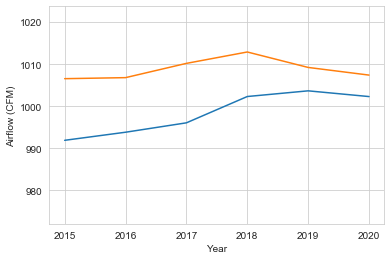

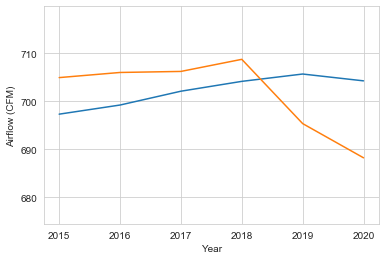

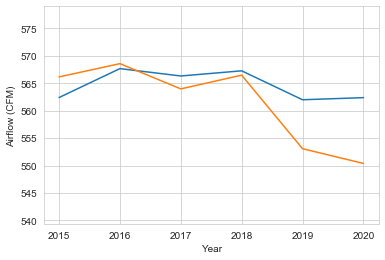

In [77]:
Airflow_Speed('high')
Airflow_Speed('medium')
Airflow_Speed('low')

675.8175824175822
686.4098461538462



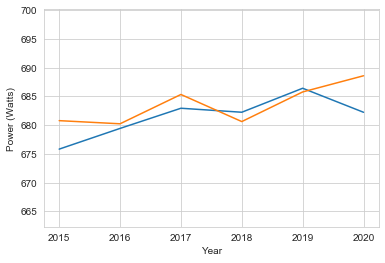

450.995934065934
456.4396153846154



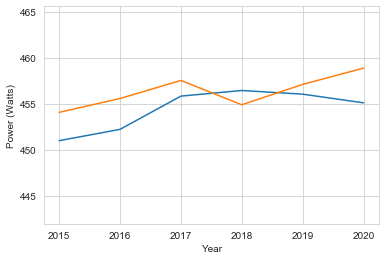

361.3005555555557
366.13448717948705



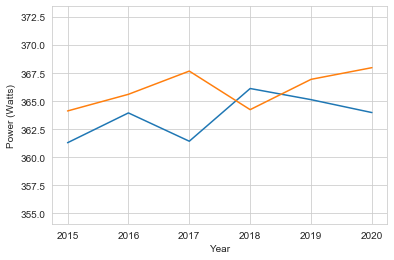

In [78]:
Watts_Speed('high')
Watts_Speed('medium')
Watts_Speed('low')

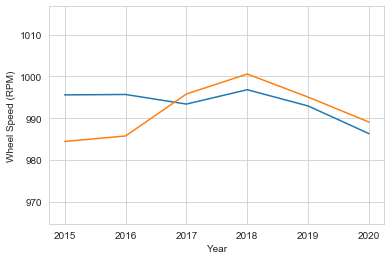

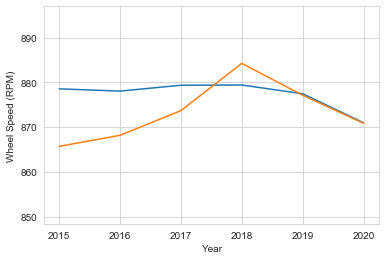

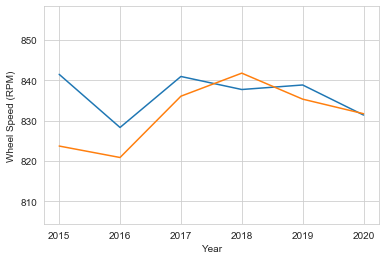

In [79]:
RPM_Speed('high')
RPM_Speed('medium')
RPM_Speed('low')

In [80]:
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])

# Full Airflow Data for the Yellow Tunnel

In [81]:
YT_Fail_High = df.loc[(df['Tunnel'] == 'yellow') & (df['Year'] > 2014) & (df['Speed'] == 'high')]
YT_Fail_Medium = df.loc[(df['Tunnel'] == 'yellow') & (df['Year'] > 2014) & (df['Speed'] == 'medium')]
YT_Fail_Low = df.loc[(df['Tunnel'] == 'yellow') & (df['Year'] > 2014) & (df['Speed'] == 'low')]

sns.set_style("whitegrid")

(736695.0, 737791.0)

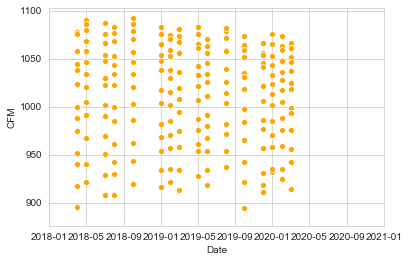

In [82]:
ax = sns.scatterplot(x='Date' , y='CFM' , data = YT_Fail_High, color = 'Orange')
plt.xlim(pd.to_datetime('2018-01-01'), pd.to_datetime('2021-01-01'))

(736695.0, 737791.0)

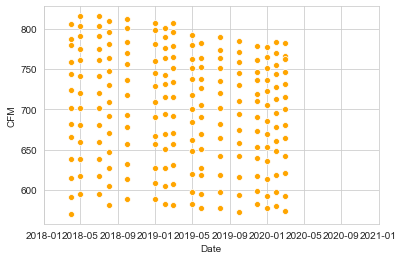

In [83]:
ax = sns.scatterplot(x='Date' , y='CFM' , data = YT_Fail_Medium, color = 'Orange')
plt.xlim(pd.to_datetime('2018-01-01'), pd.to_datetime('2021-01-01'))

(736695.0, 737791.0)

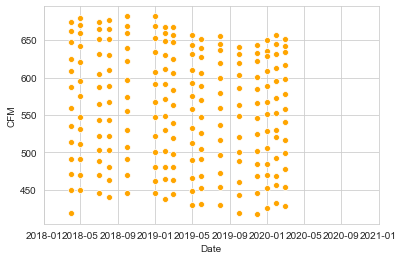

In [84]:
ax = sns.scatterplot(x='Date' , y='CFM' , data = YT_Fail_Low,  color = 'Orange')
plt.xlim(pd.to_datetime('2018-01-01'), pd.to_datetime('2021-01-01'))

# Full Airflow Data for the Black tunnel

In [85]:
BT_Fail_High = df.loc[(df['Tunnel'] == 'black') & (df['Year'] > 2014) & (df['Speed'] == 'high')]
BT_Fail_Medium = df.loc[(df['Tunnel'] == 'black') & (df['Year'] > 2014) & (df['Speed'] == 'medium')]
BT_Fail_Low = df.loc[(df['Tunnel'] == 'black') & (df['Year'] > 2014) & (df['Speed'] == 'low')]

(735385.0, 737791.0)

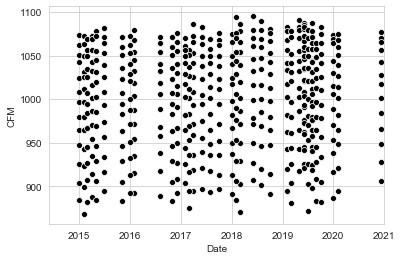

In [86]:
ax = sns.scatterplot(x='Date' , y='CFM' , data = BT_Fail_High, color = 'Black')
#ax = sns.scatterplot(x='Date' , y='CFM' , data = YT_Fail_High, color = 'Orange')
plt.xlim(pd.to_datetime('2014-06-01'), pd.to_datetime('2021-01-01'))

(735385.0, 737791.0)

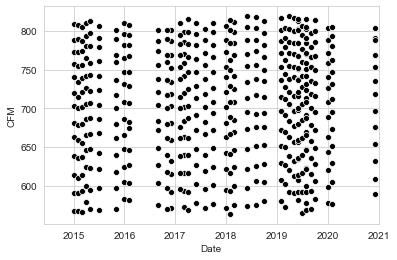

In [87]:
ax = sns.scatterplot(x='Date' , y='CFM' , data = BT_Fail_Medium, color = 'Black')
#ax = sns.scatterplot(x='Date' , y='CFM' , data = YT_Fail_Medium, color = 'Orange')
plt.xlim(pd.to_datetime('2014-06-01'), pd.to_datetime('2021-01-01'))

(735385.0, 737791.0)

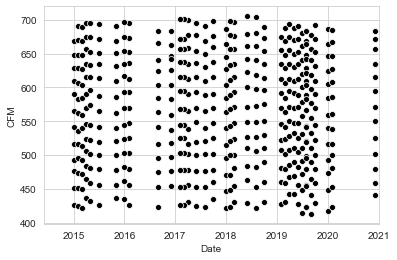

In [88]:
ax = sns.scatterplot(x='Date' , y='CFM' , data = BT_Fail_Low,  color = 'Black')
#ax = sns.scatterplot(x='Date' , y='CFM' , data = YT_Fail_Low,  color = 'Orange')
plt.xlim(pd.to_datetime('2014-06-01'), pd.to_datetime('2021-01-01'))